## Chapter04 다양한 분류 알고리즘
#### 04-01 로지스틱 회귀

In [21]:
# 럭키백의 확률
# 데이터 준비하기 

import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [22]:
#어떤 종류의 생선이 있는지 고유값 추출
# unique() 함수 사용
 
print(pd.unique(fish['Species']))


['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [23]:
# Species열을 target으로, 나머지 5개 열을 input 데이터로 사용
# 데이터프레임에서 열 선택 = 열을 리스트로

fish_input = fish[['Weight','Length','Diagonal' ,'Height', 'Width']]
fish_input.head()

,Weight,Length,Diagonal,Height,Width
0,242.0,25.4,30.0,11.5200,4.0200
1,290.0,26.3,31.2,12.4800,4.3056
2,340.0,26.5,31.1,12.3778,4.6961
3,363.0,29.0,33.5,12.7300,4.4555
4,430.0,29.0,34.0,12.4440,5.1340


In [24]:
# 동일한 방법으로 target data 만들기 

fish_target = fish ['Species']     #[[]]: 대괄호 두개를 사용하면 데이터프레임됨!
fish_target.head()

0    Bream
1    Bream
2    Bream
3    Bream
4    Bream
Name: Species, dtype: object

In [25]:
# 데이터 세트를 훈련과 테스트 세트로 나누기 

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)


In [26]:
# StandardScaler를 사용해 데이터 전처리
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

#### K-최근접 이웃 분류기의 확률 예측

In [27]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


In [28]:
# 다중 분류(multiclass classification): 타깃 데이터에 2개 이상의 클래스 포함(여기선 7종의 생선)
# 사이킷런에서는 문자열 그대로도 타깃값으로 사용 가능, but 순서는 알파벳 순으로
# KNeighborsClassifier로 정렬된 타킷값은 classes_ 속성에 저장

print(kn.classes_)

#Bream이 첫번째 클래스, Parkki가 두번째 클래스 

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [29]:
#테스트 세트에서 처음 5개의 샘플 타킷값 예측 

print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [30]:
#테스트 세트의 처음5개 샘플에 대한 확률 출력 
# predict_proba() method로 클래스별 확률값 반환
# round(): 기본으로 소수점 첫째 자리에서 반올림, decimals 매개변수로 소수점 아래 자리 수 지정
import numpy as np
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4))


[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


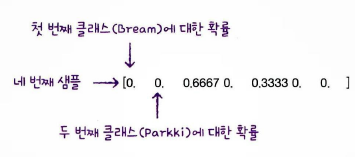

In [31]:
#네번째 샘플의 최근접 이웃의 클래스 확인 
#kneighnots() method의 입력은 2차원 배열이여야함, 넘파이 배열의 슬라이싱 연사자 사용
#슬라이싱 연산자: 하나의 샘플만 선택해도 항상 2차원 배열 만들어짐
#iloc method: 주어진 값을 정수인덱스로 사용해 행이나 열 선택

distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target.iloc[indexes[0]])

52     Roach
106    Perch
103    Perch
Name: Species, dtype: object


#### 로지스틱 회귀 (Logistic Regresion) : 회귀이지만 분류모델
#### 선형방정식 학습 
#### z= a * (weight) + b * (length) + c * (diagonal) + d x (height) + e * (width) + f    
#### a, b, c, d , e 는 가중치 혹은 계수
#### Z는 어떤 값도 가능, 하지만 확률이 되려면 0~1 또는 0~100% 사이 값이 되어야함
#### Z가 아주 큰 음수일 때 0이 되고, 아주 큰 양수 일때 1이 됨
#### 시그모이드 함수(sigmoid function) or 로지스틱 함수(logistic function)을 사용

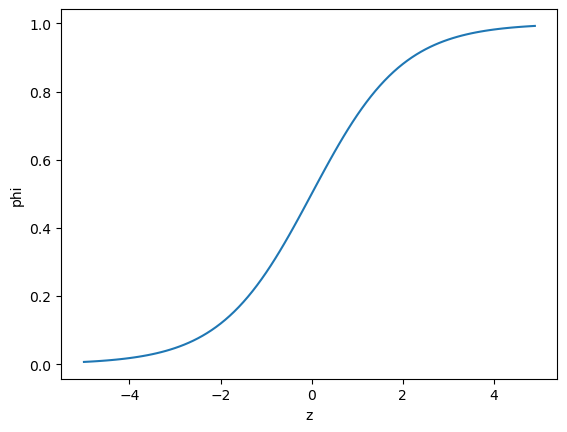

In [32]:
import numpy as np
import matplotlib.pyplot as plt
z=np.arange(-5, 5, 0.1)    #간격이 0.1 
phi = 1 / (1+np.exp(-z))   #지수 함수 계산 : np.exp() 함수 사용
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()


In [33]:
#로지스틱 회귀로 이진 분류 수행하기 
#블리언 인덱싱(boolean indexing): True/False

char_rr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_rr[[True, False, True, False, False]])

['A' 'C']


In [34]:
print(set(train_target))

{'Parkki', 'Pike', 'Smelt', 'Whitefish', 'Perch', 'Bream', 'Roach'}


In [35]:
print(train_scaled.shape, len(train_target))

(119, 5) 119


In [36]:
#train 세트에서 도미와 빙어의 행만 골라내자
#도미와 빙어의 행을 모두 true로 만들 수 있음
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')   #train_target == 'bream', 도미인 행을 골라냄, #train_target == 'Smelt', 빙어인 행을 골라냄
train_bream_smelt= train_scaled[bream_smelt_indexes]
target_bream_smelt= train_target[bream_smelt_indexes]


In [ ]:
from sklearn.linear_model import LogisticRegression   #LogisticRegression 클래스는 선평 모델임으로 sklearn.linerar_model 패키지 아래 있음 
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [39]:
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [ ]:
#처음 5개의 샘플 예측 확률 출력
#샘플마다 2개의 확률이 출력됨
print(lr.predict_proba(train_bream_smelt[:5])) 

[[0.99760007 0.00239993]
 [0.02737325 0.97262675]
 [0.99486386 0.00513614]
 [0.98585047 0.01414953]
 [0.99767419 0.00232581]]


In [ ]:
#사이킷런에서 타깃값은 알파벳순으로 정렬
# 빙어가 양성 클래스
print(lr.classes_)


['Bream' 'Smelt']


In [42]:
#계수확인 
print(lr.coef_, lr.intercept_)

[[-0.40451732 -0.57582787 -0.66248158 -1.01329614 -0.73123131]] [-2.16172774]


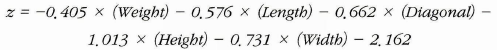

In [ ]:
#z값 예측
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02991358  3.57043428 -5.26630496 -4.24382314 -6.06135688]


In [ ]:
#scipy 라이브러리의 expit()함수를 사용하여 확률계산, np.exp()보다 편리
from scipy.special import expit
print(expit(decisions))

[0.00239993 0.97262675 0.00513614 0.01414953 0.00232581]


#### 로지스틱 회귀로 다중 분류 수행하기

In [45]:
lr=LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled,train_target)
print(lr.score(train_scaled,train_target))
print(lr.score(test_scaled,test_target))

0.9327731092436975
0.925


In [46]:
#테스트 세트의 처음 5개 샘플에 대한 예측 
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [48]:
#테스트 세트의 처음 5개 샘플에 대한 예측 확률
proba=lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [49]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [ ]:
#다중 분류일 겨우 선형 방정식
print(lr.coef_.shape, lr.intercept_.shape)

#다중분류는 소프트맥스(softmax) 함수를 사용하여 7개의 z값을 확률로 변환

(7, 5) (7,)


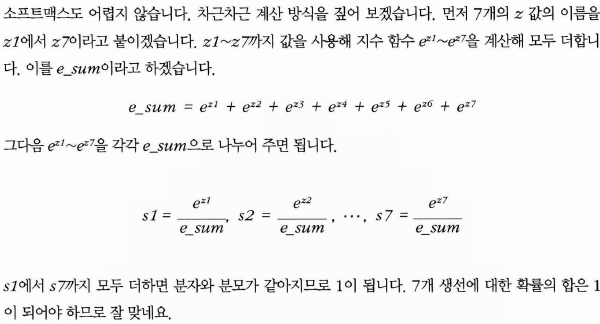

In [52]:
#소프트맥수 함수를 사용해서 z값 구하기
decision=lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ -6.51   1.04   5.17  -2.76   3.34   0.35  -0.63]
 [-10.88   1.94   4.78  -2.42   2.99   7.84  -4.25]
 [ -4.34  -6.24   3.17   6.48   2.36   2.43  -3.87]
 [ -0.69   0.45   2.64  -1.21   3.26  -5.7    1.26]
 [ -6.4   -1.99   5.82  -0.13   3.5   -0.09  -0.7 ]]


In [54]:
from scipy.special import softmax
proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


### 04-2 확률적 경사 하강법
#### - 점진적 학습 or 온라인 학습: 앞서 훈련한 모델을 버리지 않고 새로운 데이터에 대해서만 조금씩 더 훈련
#### - 확률적 경사 하강법(Stochastic Gradient Descent): 대표적인 점진적 학습 알고리즘
#### - 가장 가파른 길을 안전하게 내려 오는 것
#### - 확률적: 전체 샘플을 활용하지 않고 딱 하나의 샘플을 훈련 세트에서 랜덤하게 골라 가장 가파른 길을 찾는 것, 훈련 세트에서 랜덤하게 하나의 샘플을 고르는 것
#### - 훈련세트에서 하나의 샘플을 골라 가장 가파른 길을 찾음, 또 다른 하나의 샘플을 골라 또 가장 가파른 길을 조금씩 내려감
#### - 에포크(epoch): 훈련세트를 한 번에 모두 사용하는 과정, 일반적으로 수십, 수백 번 이상 에포크 수행
#### - 미니배치 경사 하강법(minibatch gradient descent): 여러개의 샘플을 사용해 경사 하강법 수행하는 방식
#### - 배치 경사 하강법(batch gradient descent): 전체 데이터 사용하여 경사로를 따라 이동
#### - 신경망 알고리즘: 확률적 경사 하강법 꼭 사용하는 알고리즘

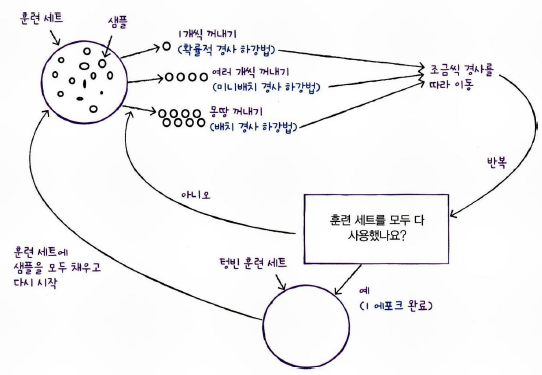

#### - 손실함수(loss function): 산, 어떤 문제에서 머신러닝 알고리즘이 얼마나 엉터리인지 측정하는 기준, 값이 작을수록 좋음. 
#### - 비용함수(cost function) : 손실 함수는 샘플 하나에 대한 손실을 정의, 비용함수는 훈련 세트에 있는 모든 샘플에 대한 손실 함수의 합 
#### - 손실함수는 미분가능해야함(즉, 손실함수로 사용하는 값은 연속적이여야함)
#### - 로지스틱 손실 함수(logistic loss function) = 이진 크로스엔트로피 손실 함수(binary cross-entropy loss function)
#### - 크로스엔트로피 손실 함수(cross-entropy loss function) : 다중 분류에서 사용

#### SGDClassifier

In [55]:
import pandas as pd
fish= pd.read_csv('https://bit.ly/fish_csv_data')

In [56]:
fish_input= fish[['Weight','Length','Diagonal','Height','Width']]
fish_target= fish['Species']

In [58]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target,test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [59]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(train_input)
train_scaled=ss.transform(train_input)
test_scaled=ss.transform(test_input)

In [60]:
#SGDClassifier: 사이킷런에서 확률적 경사 하강법을 제공하는 대표적인 분류적 클래스

from sklearn.linear_model import SGDClassifier

In [ ]:
#loss='log_loss'지정해서 로지스틱 손실함수 지정, max_iter를 10으로 지정해서 에포크 횟수 지정(전체 훈련 횟수 10회 반복), 정확도 점수 출력
sc=SGDClassifier(loss= 'log_loss', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/home/user/anaconda3/envs/ai-study/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [ ]:
# 모델훈련할때 partial fit() method 사용, 호출할 때마다 1에포크씩 이어서 훈련
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.7983193277310925
0.775


#### > 에포크와 과대/과소적합
#### - 에포크 횟수가 적으면 훈련 세트 덜 학습(과소적합), 에포크 횟수가 너무 많으면 훈련 세트를 완전 학습(과대적합)
#### - 조기종료(early stopping): 과대적합이 시작하기 전에 훈련을 멈추는 것

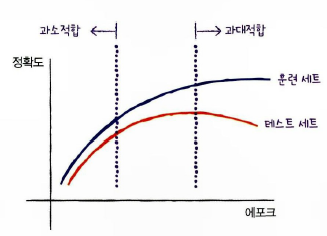

In [65]:
import numpy as np
sc= SGDClassifier(loss='log_loss', random_state=42)
train_score= []  #에포크마다 훈련 세트와 테스트 세트에 대한 점수를 기록하기 위해 2개의 리스트 준비
test_score=[]
classes= np.unique(train_target) #np.unique()함수로 train_target에 있는 7개 생선 목록 생성

In [66]:
#300번의 에포크 훈련 반복
for _ in range (0, 300): 
    sc.partial_fit(train_scaled, train_target, classes=classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))


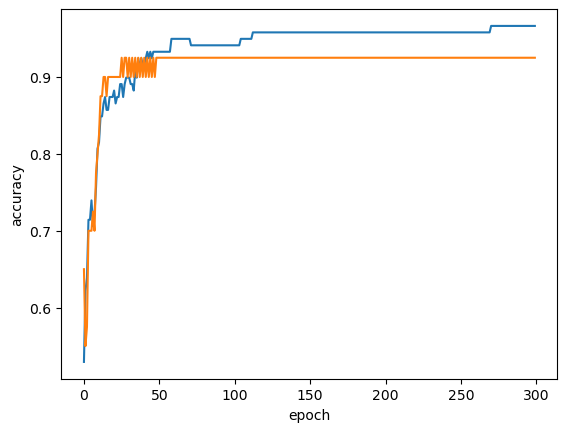

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

#그래프 분석 결과 100번 에포크가 적절한 반복 횟수로 보임

In [ ]:
#SGDClassifier는 일정 에포크 동안 성능이 향상되지 않으면 자동을 멈춤
#tol: 매개변수에서 향상될 최솟값 지정, None으로 지정해서 에포크가 100회까지 반복 학습하게 설정

sc=SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42)   
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))


0.957983193277311
0.925
